<a href="https://colab.research.google.com/github/svarunkishore/Adaptive_Cyber_Defence_System/blob/main/Random_Forest_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 8.3 MB/s eta 0:00:00


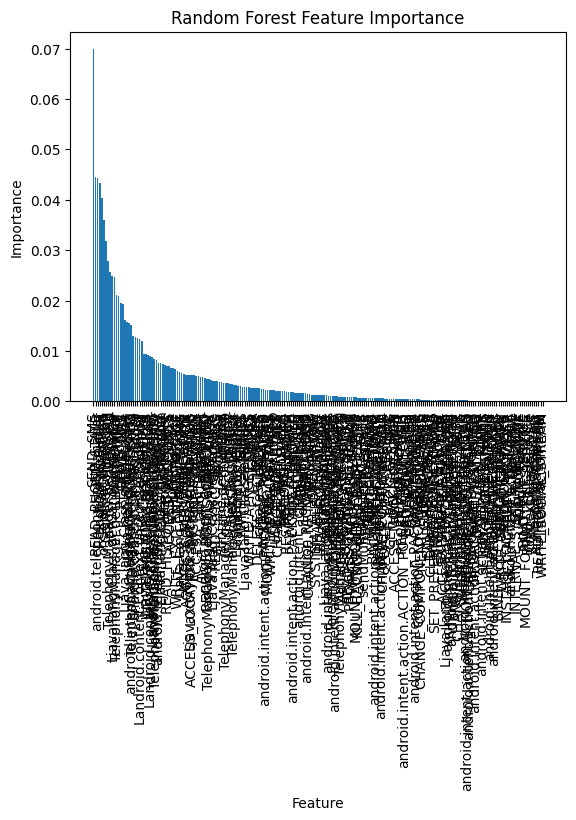

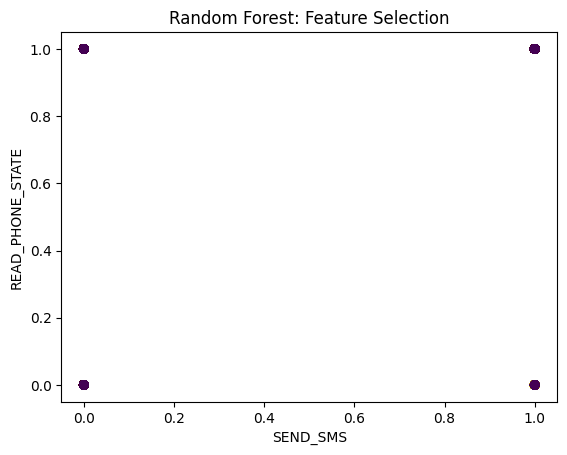

In [14]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

file_path = '/content/imputed_dataset.csv'  # Replace with the actual path to your CSV file
df = pd.read_csv(file_path)

# Separate features (X) and target variable (y), if applicable
X = df.drop('class', axis=1)  # Adjust 'target_variable' to the name of your target column
y = df['class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Get feature importances from the trained model
feature_importances = rf_classifier.feature_importances_

# Sort features by importance in descending order
sorted_idx = feature_importances.argsort()[::-1]

# Encode the class labels to numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Plot the feature importances
plt.bar(range(X.shape[1]), feature_importances[sorted_idx], align="center")
plt.xticks(range(X.shape[1]), X.columns[sorted_idx], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Random Forest Feature Importance')
plt.show()

# Select the top k features based on importance (adjust k as needed)
k = 50
selected_features = X.columns[sorted_idx][:k]

# Subset the DataFrame with selected features
X_selected = X[selected_features]

# Visualize the reduced data
plt.scatter(X_selected.iloc[:, 0], X_selected.iloc[:, 1], c=y_encoded, cmap='viridis')
plt.title('Random Forest: Feature Selection')
plt.xlabel(selected_features[0])
plt.ylabel(selected_features[1])
plt.show()

# Concatenate the selected features with the target variable
df_final = pd.concat([X_selected, y], axis=1)

# Save the final DataFrame to a new CSV file
df_final.to_csv('new_dataset_rf.csv', index=False)
